# Logistic regression

## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, the attributes in this dataset is a subset of the original dataset. Several columns are simply ignored, and some of the important attritubes like age, account balance etc. are retained.

## Dataset: German Credit Risk

- Age (Numeric : Age in years)
- Sex (Categories : male, female)
- Job (Categories : 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (Categories : own, rent, or free)
- Saving accounts (Categories : little, moderate, quite rich, rich)
- Checking account (Categories : little, moderate, rich)
- Credit amount (Numeric : Amount of credit in DM - Deutsche Mark)
- Duration (Numeric : Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Pesron is at risk(defaulter))

# Objective

The objective is to estimate probabilities whether a person would default or not using logistic regression. In this dataset, the target variable is 'Risk'.

# 1. Load Libraries and data

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
#Load data
df = pd.read_csv('German_Credit.csv')

# read_excel is used to read xlsx files

In [43]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [44]:
df.describe()

,Age,Job,Credit amount,Duration,Risk
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,35.55,1.90,"3,271.26",20.90,0.30
std,11.38,0.65,"2,822.74",12.06,0.46
min,19.00,0.00,250.00,4.00,0.00
25%,27.00,2.00,"1,365.50",12.00,0.00
50%,33.00,2.00,"2,319.50",18.00,0.00
75%,42.00,2.00,"3,972.25",24.00,1.00
max,75.00,3.00,"18,424.00",72.00,1.00


- Job and Risk are categrical varaibles, so these metrics do not make much sense for these columns.
- We can see that both 'Age' and 'Credit amount' have large range of values and data is skewed, which we can confirm later by plotting their histograms/displots.

**We observed the numeric variables, now let's see the count of each category for all categorical variables.**

In [45]:
for column in df.select_dtypes(include='object'):
    print(df[column].value_counts())
    print()

male      690
female    310
Name: Sex, dtype: int64

own     713
rent    179
free    108
Name: Housing, dtype: int64

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64



# 2. Calculate the percentage of missing values for each column and fill those missing values.


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


**We can see that two columns have null values in the dataset. Let's calculate the percentage of null values in all columns.**

In [47]:
df.isna().sum()/len(df.isna())

Age                0.00
Sex                0.00
Job                0.00
Housing            0.00
Saving accounts    0.18
Checking account   0.39
Credit amount      0.00
Duration           0.00
Purpose            0.00
Risk               0.00
dtype: float64

## Insights
- We can see that two columns - 'Saving accounts' and 'Checking account' have 18% and 39% missing values respectively.
- We can either drop these columns or drop rows with missing values but then we would lose data for such a small dataset.
- As both of these columns are categorical, we can treat those missng values as a new category.

In [48]:
df['Saving accounts'].fillna(value='unknown',inplace=True)
df['Checking account'].fillna(value='unknown',inplace=True)

# 3. Plot histogram for columns 'Credit amount' and 'Age'

<AxesSubplot:>

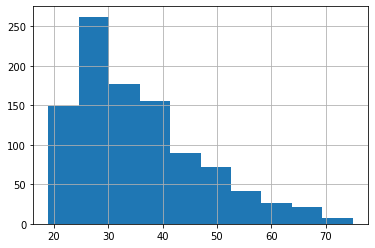

In [49]:
df['Age'].hist()

<AxesSubplot:xlabel='Age'>

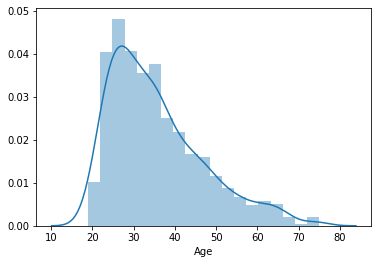

In [53]:
sns.distplot(df['Age'])

<AxesSubplot:>

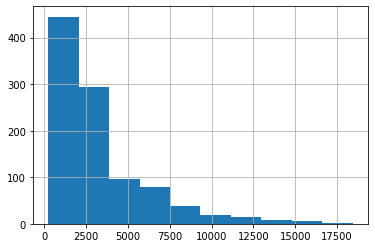

In [13]:
df['Credit amount'].hist()

# 4. Create counplots for columns 'Duration', 'Purpose'. What durations are most common and for what purposes most credits are taken?

<AxesSubplot:xlabel='Duration', ylabel='count'>

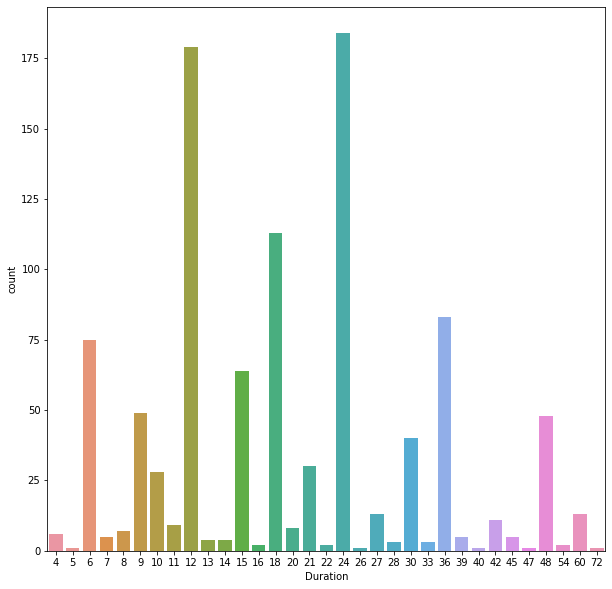

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(df['Duration'])

<AxesSubplot:xlabel='Purpose', ylabel='count'>

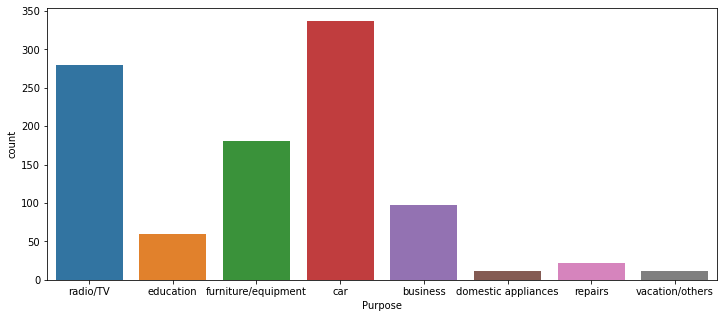

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(df['Purpose'])

- We can see that yearly duration like 12 months, 24 months is more common than other months. Highest number of credits are taken for one or two years.
- Most of the purposes for taking credits are luxurious items like car, radio/tv or furniture.

# 5. Which 'Job', 'Savings account', 'Checking account' has highest number of defaulters?

<AxesSubplot:xlabel='Sex', ylabel='count'>

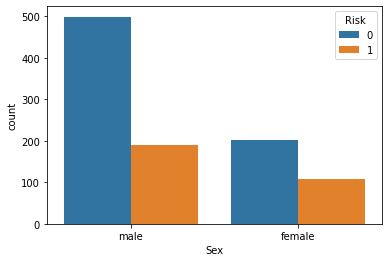

In [16]:
sns.countplot(df['Sex'],hue=df['Risk'])

<AxesSubplot:xlabel='Job', ylabel='count'>

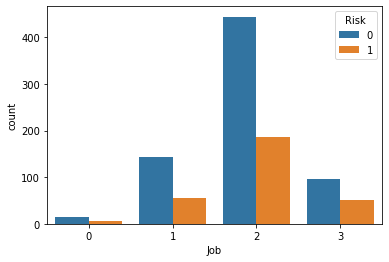

In [17]:
sns.countplot(df['Job'],hue=df['Risk'])

In [18]:
pd.crosstab(df['Job'],df['Risk'],normalize=True)

Risk,0,1
Job,,
0,0.01,0.01
1,0.14,0.06
2,0.44,0.19
3,0.10,0.05


<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

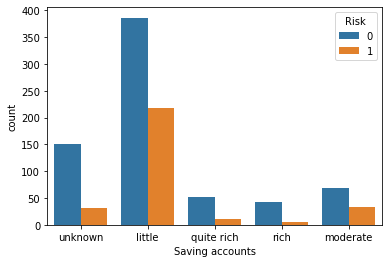

In [20]:
sns.countplot(df['Saving accounts'],hue=df['Risk'])

<AxesSubplot:xlabel='Checking account', ylabel='count'>

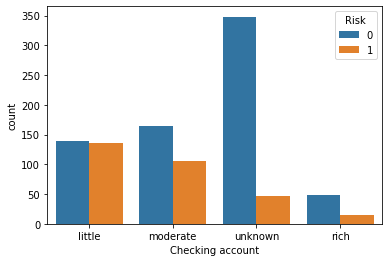

In [21]:
sns.countplot(df['Checking account'],hue=df['Risk'])

## Insights
- Number of make defaulters are more than the number of female defaulters. But this can also be due to the fact that count of male customers is more than the count the female customers.
- Customers with 'skilled' job has highest number of defaulters.
- For both savings and checking account, customers with 'little' money are most common defaulters.

# 6. Convert 'Credit amount' and 'Age' into categorical features by grouping them into different intervals and drop the original columns.
You can decide the intervals using df.describe() method.

**This is not a necessary step but as we have only two continuous varaibles and their distribution is skewed, it can help to treat them as categorical variables to predict our categorical target. We can decide the intervals using 4 quantiles given by df.describe() method.**

In [22]:
df.describe()

,Age,Job,Credit amount,Duration,Risk
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,35.55,1.90,"3,271.26",20.90,0.30
std,11.38,0.65,"2,822.74",12.06,0.46
min,19.00,0.00,250.00,4.00,0.00
25%,27.00,2.00,"1,365.50",12.00,0.00
50%,33.00,2.00,"2,319.50",18.00,0.00
75%,42.00,2.00,"3,972.25",24.00,1.00
max,75.00,3.00,"18,424.00",72.00,1.00


In [23]:
bins = [18, 27, 33, 43, 76]

cats = ['18-26', '27-32', '33-42', '43-76']
df["Age_cat"] = pd.cut(df.Age, bins, labels=cats)
df['Age_cat']

0      43-76
1      18-26
2      43-76
3      43-76
4      43-76
       ...  
995    27-32
996    33-42
997    33-42
998    18-26
999    18-26
Name: Age_cat, Length: 1000, dtype: category
Categories (4, object): ['18-26' < '27-32' < '33-42' < '43-76']

In [24]:
bins = [249, 1365, 2319, 3972, 18425]

cats = ['low', 'moderate', 'high', 'very high']
df["Credit_cat"] = pd.cut(df['Credit amount'], bins, labels=cats)
df["Credit_cat"]

0            low
1      very high
2       moderate
3      very high
4      very high
         ...    
995     moderate
996         high
997          low
998     moderate
999    very high
Name: Credit_cat, Length: 1000, dtype: category
Categories (4, object): ['low' < 'moderate' < 'high' < 'very high']

# 7. Find out total number of defaulters where for each category of 'Age' and  'Credit amount'.

In [25]:
pd.crosstab(df['Credit_cat'],df['Risk'],margins=True)

Risk,0,1,All
Credit_cat,,,
low,173,77,250
moderate,188,62,250
high,194,56,250
very high,145,105,250
All,700,300,1000


In [26]:
pd.crosstab(df['Age_cat'],df['Risk'],margins=True)

Risk,0,1,All
Age_cat,,,
18-26,184,107,291
27-32,151,74,225
33-42,202,64,266
43-76,163,55,218
All,700,300,1000


# 8. Prepare input data for the model

In [27]:
X=df.drop(columns=['Credit amount','Age','Risk']) #Dropping continuous 'Age' and 'Credit amount' and keeping the categorical ones we created above
Y=df['Risk']
X.Duration=X.Duration/12 #Converting monthly values to yearly, Logistic Regression depends on the scale of the variables so it helps to have variables with similar scale or small scale.

In [28]:
X=pd.get_dummies(data=X,drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7,stratify=Y)
#'stratify' argument maintains the distribution of classes in train and test sets same as original dataset.

In [30]:
y_train.value_counts()

0    490
1    210
Name: Risk, dtype: int64

In [31]:
y_test.value_counts()

0    210
1     90
Name: Risk, dtype: int64

# 9. Predict Target Variable for Test Data using Sklearn

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [34]:
from sklearn.metrics import recall_score, roc_auc_score, classification_report,confusion_matrix

In [35]:
recall_score(y_test,y_pred)

0.3888888888888889

In [36]:
roc_auc_score(y_test,y_pred)

0.6420634920634921

# 10. Try calculating Probabilities of Target using Sklearn

In [37]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = model.predict_proba(x_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = model.predict_proba(x_test)[:,1]

z['Predicted'] = model.predict(x_test)                               # Predicting target variable using sklearn Logistic regression

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

In [39]:
model.predict_proba(x_test)

array([[0.32246507, 0.67753493],
       [0.78113203, 0.21886797],
       [0.59628415, 0.40371585],
       [0.43059224, 0.56940776],
       [0.34416543, 0.65583457],
       [0.89225493, 0.10774507],
       [0.36961062, 0.63038938],
       [0.6740694 , 0.3259306 ],
       [0.9494471 , 0.0505529 ],
       [0.6537867 , 0.3462133 ],
       [0.9463577 , 0.0536423 ],
       [0.5595762 , 0.4404238 ],
       [0.85241589, 0.14758411],
       [0.92760772, 0.07239228],
       [0.23925442, 0.76074558],
       [0.95579695, 0.04420305],
       [0.59170615, 0.40829385],
       [0.59692426, 0.40307574],
       [0.66144059, 0.33855941],
       [0.91061919, 0.08938081],
       [0.61547194, 0.38452806],
       [0.79047406, 0.20952594],
       [0.60115508, 0.39884492],
       [0.46453452, 0.53546548],
       [0.31277588, 0.68722412],
       [0.52148849, 0.47851151],
       [0.90696661, 0.09303339],
       [0.50608766, 0.49391234],
       [0.35881906, 0.64118094],
       [0.93417246, 0.06582754],
       [0.

In [36]:
z.head(20)

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,1,0.32,0.68,1
1,1,0.78,0.22,0
2,0,0.60,0.40,0
3,0,0.43,0.57,1
4,1,0.35,0.65,1
5,0,0.89,0.11,0
6,0,0.37,0.63,1
7,0,0.67,0.33,0
8,0,0.95,0.05,0
9,0,0.65,0.35,0


# 11. Build a confusion matrix and display the same using heatmap plot

In [37]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No Default","Default"] , yticklabels = ["No Default","Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

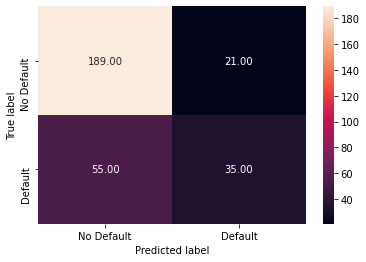

In [38]:
draw_cm( z['Actual'], z['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       210
           1       0.62      0.39      0.48        90

    accuracy                           0.75       300
   macro avg       0.70      0.64      0.66       300
weighted avg       0.73      0.75      0.73       300



# 12.  Predicted Probability distribution Plots for defaulters and non defaulters

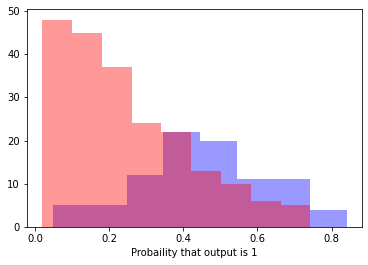

In [40]:
sns.distplot( z[z['Actual'] == 1]["Probaility that output is 1"], kde=False, color = 'b' )
sns.distplot( z[z['Actual'] == 0]["Probaility that output is 1"], kde=False, color = 'r' )
plt.show()

# Conclusion

### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted deafulter and the customer is actually a defaulter.

*False Positive (observed=0,predicted=1):*

Predicted defaulter and the customer is not a defaulter.

*True Negative (observed=0,predicted=0):*

Predicted non-defaulter and the customer is a non-defaulter.

*False Negative (observed=1,predicted=0):*

Predicted non-defaulter and the customer is a defaulter.

### `Important Metric`

Here more focus towards should be towards recall because our target variable is 'Risk' , i.e whether the customer is returning the credit taken or not. And the bank wants more people to return the credit which means less number of defaulters i.e. **less number of False Negative**, because we want to be able to catch as many potential defaulters as possible so as to not incur losses to the bank. Hence the **focus should be on increasing Recall**.

**NOTE** : In the confusion matrix above, the model predicted 38 defaulters correctly out of 90 i.e. recall of aprrox 42%. So, this can be futher improved.

After achieving the desired accuracy we can deploy the model for practical use. The bank loaning process can be quite a manual and tiresome task in identifying who might be a potential defaulter. So the bank can use use the model for upcoming customers.

# Additional Content

## Fit logistic regression model  (Statsmodel)

In [41]:
import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( x_train ) )

lg = logit.fit()

lg.summary()

Optimization terminated successfully.
         Current function value: 0.506688
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  700
Model:                          Logit   Df Residuals:                      674
Method:                           MLE   Df Model:                           25
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                  0.1705
Time:                        09:10:21   Log-Likelihood:                -354.68
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 4.896e-19
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3234      0.620      0.522      0.602      -0.891       1.538
Job                             0.1063      0.149      0.715      0.474      -0.185       0.398
Duration                        0.4038      0.120      3.376      0.001       0.169       0.638
Sex_male                       -0.2443      0.213     -1.147      0.251      -0.662       0.173
Housing_own                    -0.4215      0.303     -1.390      0.165      -1.016       0.173
Housing_rent                    0.2038      0.365      0.559      0.576      -0.511       0.919
Saving accounts_moderate       -0.0685      0.302     -0.227      0.821      -0.660       0.523
Saving accounts_quite rich     -0.3280      0.444     -0.739      0.460      -1.198       0.542
Saving accounts_rich           -0.6686      0.509     -1.313      0.189      -1.667       0.329
Saving accounts_unknown        -0.8313      0.291     -2.854      0.004      -1.402      -0.260
Checking account_moderate      -0.5281      0.243     -2.175      0.030      -1.004      -0.052
Checking account_rich          -0.7143      0.380     -1.879      0.060      -1.459       0.031
Checking account_unknown       -1.7125      0.252     -6.800      0.000      -2.206      -1.219
Purpose_car                    -0.0759      0.343     -0.222      0.825      -0.747       0.596
Purpose_domestic appliances    -0.1945      0.818     -0.238      0.812      -1.798       1.409
Purpose_education               0.0785      0.489      0.160      0.873      -0.881       1.038
Purpose_furniture/equipment    -0.2040      0.380     -0.537      0.591      -0.949       0.541
Purpose_radio/TV               -0.4953      0.357     -1.388      0.165      -1.195       0.204
Purpose_repairs                 0.0436      0.654      0.067      0.947      -1.238       1.325
Purpose_vacation/others        -0.4476      0.873     -0.513      0.608      -2.159       1.264
Age_cat_27-32                  -0.0597      0.263     -0.227      0.820      -0.575       0.456
Age_cat_33-42                  -0.3456      0.271     -1.278      0.201      -0.876       0.185
Age_cat_43-76                  -0.4978      0.285     -1.745      0.081      -1.057       0.061
Credit_cat_moderate            -0.4218      0.279     -1.512      0.130      -0.968       0.125
Credit_cat_high                -0.9036      0.304     -2.972      0.003      -1.499      -0.308
Credit_cat_very high           -0.1681      0.339     -0.495      0.620      -0.833       0.497
===============================================================================================
"""

## Convert probabilities to target variables and changing the threshold

In [42]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( x_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.6 as values above 0.6 probability is converted to '1'

y_pred_df[0:5]

,actual,predicted_prob,predicted
812,1,0.70,1
651,1,0.21,0
482,0,0.37,0
221,0,0.60,0
528,1,0.67,1
